# Машинное обучение

### Подргрузим всякого:

In [70]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

---

### Поработаем с данными и табличкой:

In [71]:
df = pd.read_csv('Data.txt', sep=",", header = None, engine='python')

In [72]:
df = df.rename(columns=df.iloc[0])
df = df.drop(index=[0])
df['Год'] = df['Год'].astype(int)
df['Цена(руб)'] = df['Цена(руб)'].astype(int)

In [73]:
df = df[['Марка', 'Год', 'Город', 'Пробег(км)', 'Объем двигателя (см³)', 'Мощность двигателя (л.с.)', 'Цилиндров', 'Коробка', 'Привод', 'Цвет', 'Цена(руб)']]

In [74]:
df

,Марка,Год,Город,Пробег(км),Объем двигателя (см³),Мощность двигателя (л.с.),Цилиндров,Коробка,Привод,Цвет,Цена(руб)
1,ABM,2015,Вязьма,7400,125,11.0,1.0,МКПП-4,цепь,чёрный,36000
2,ABM,2013,Егорьевск,15000,200,19.0,1.0,МКПП-5,цепь,чёрный,63000
3,ABM,2014,Сиверский,1500,200,15.0,1.0,МКПП-5,цепь,зелёный,90000
4,ABM,2023,Татарская Каргала,700,110,9.0,1.0,МКПП-4,цепь,чёрный,62000
5,ABM,2023,Фрязино,500,110,7.0,1.0,МКПП-4,цепь,чёрный,75000
...,...,...,...,...,...,...,...,...,...,...,...
18307,Урал,1989,Нижнедонской,17865,1,32.0,2.0,МКПП-4,ремень,синий,30000
18308,Урал,1992,Москва,12600,750,36.0,2.0,МКПП-4,кардан,синий,200000
18309,Урал,1998,Кинешма,5000,720,40.0,2.0,МКПП-4,кардан,синий,250000
18310,Урал,1982,Барнаул,1000,745,41.0,2.0,МКПП-4,кардан,чёрный,100000


In [75]:
data_new = pd.get_dummies(df, columns = ['Город','Марка', 'Год', 'Коробка', 'Привод', 'Цвет'], drop_first = True, dtype = 'int')
data_new

,Пробег(км),Объем двигателя (см³),Мощность двигателя (л.с.),Цилиндров,Цена(руб),Город_Абдулино,Город_Абинск,Город_Авдон,Город_Агалатово,Город_Агинское,...,Цвет_коричневый,Цвет_красный,Цвет_оранжевый,Цвет_пурпурный,Цвет_розовый,Цвет_серебристый,Цвет_серый,Цвет_синий,Цвет_фиолетовый,Цвет_чёрный
1,7400,125,11.0,1.0,36000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15000,200,19.0,1.0,63000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1500,200,15.0,1.0,90000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,700,110,9.0,1.0,62000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,500,110,7.0,1.0,75000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18307,17865,1,32.0,2.0,30000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18308,12600,750,36.0,2.0,200000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18309,5000,720,40.0,2.0,250000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18310,1000,745,41.0,2.0,100000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
#data_new.dtypes

---

### Перейдём к ML:

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
y = data_new['Цена(руб)']
x = data_new.drop('Цена(руб)', axis = 1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [81]:
from sklearn.linear_model import LinearRegression

ln = LinearRegression().fit(X_train, y_train)

In [82]:
ln_rmse = rmse(y_test, ln.predict(X_test))
ln_rmse

460541.5970913244

In [83]:
y_test_hat = ln.predict(X_test)
y_train_hat = ln.predict(X_train)

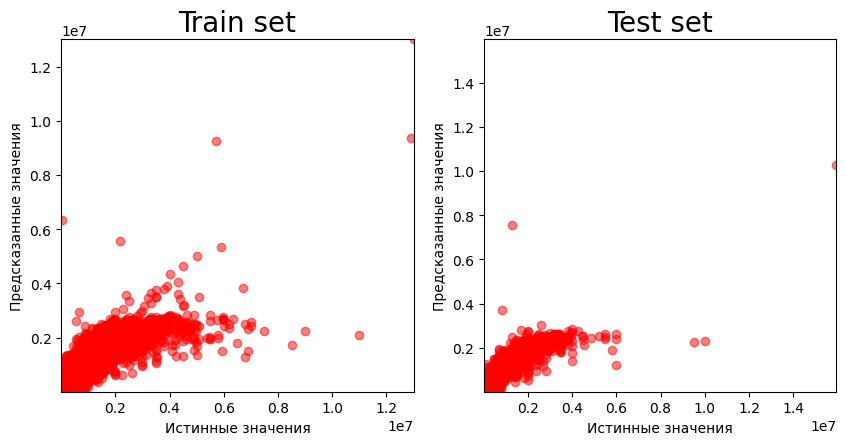

In [84]:
plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat)

---

### Взято с 3 домашки:

In [64]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass